In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest

In [2]:
data=pd.read_csv("BuyerRatio.csv")

In [3]:
data

,Observed Values,East,West,North,South
0,Males,50,142,131,70
1,Females,435,1523,1356,750


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Observed Values  2 non-null      object
 1   East             2 non-null      int64 
 2   West             2 non-null      int64 
 3   North            2 non-null      int64 
 4   South            2 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 208.0+ bytes


In [5]:
data.describe()

,East,West,North,South
count,2.000000,2.000000,2.000000,2.000000
mean,242.500000,832.500000,743.500000,410.000000
std,272.236111,976.514465,866.205807,480.832611
min,50.000000,142.000000,131.000000,70.000000
25%,146.250000,487.250000,437.250000,240.000000
50%,242.500000,832.500000,743.500000,410.000000
75%,338.750000,1177.750000,1049.750000,580.000000
max,435.000000,1523.000000,1356.000000,750.000000


In [6]:
data.mean()

C:\Users\dell\AppData\Local\Temp/ipykernel_7264/531903386.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.mean()


East     242.5
West     832.5
North    743.5
South    410.0
dtype: float64

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

<AxesSubplot:xlabel='South', ylabel='Density'>

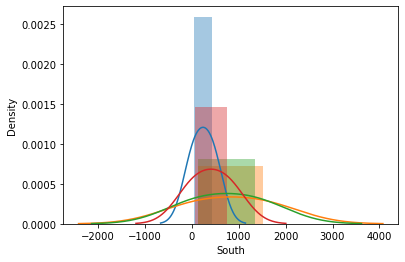

In [7]:
sns.distplot(data['East'])
sns.distplot(data['West'])
sns.distplot(data['North'])
sns.distplot(data['South'])

In [8]:
East=data['East']
West=data['West']
North=data['North']
South=data['South']

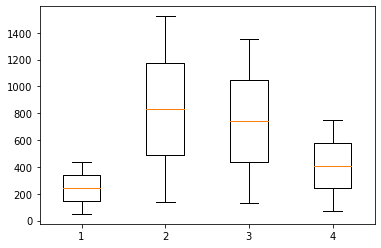

In [9]:
box_plot_data=[East,West,North,South]
plt.boxplot(box_plot_data)
plt.show()

In [10]:
alpha=0.05
Male = [50,142,131,70]
Female=[435,1523,1356,750]
Sales=[Male,Female]
print(Sales)

[[50, 142, 131, 70], [435, 1523, 1356, 750]]


In [11]:
chiStats = sp.stats.chi2_contingency(Sales)
print('Test t=%f p-value=%f' % (chiStats[0], chiStats[1]))
print('Interpret by p-Value')
if chiStats[1] < 0.05:
  print('we reject null hypothesis')
else:
  print('we accept null hypothesis')

Test t=1.595946 p-value=0.660309
Interpret by p-Value
we accept null hypothesis


In [12]:
#critical value = 0.1
alpha = 0.05
critical_value = sp.stats.chi2.ppf(q = 1 - alpha,df=chiStats[2])# Find the critical value for 95% confidence*
                      #degree of freedom

observed_chi_val = chiStats[0]

In [13]:
if observed_chi_val <= critical_value:
    print ('Null hypothesis cannot be rejected (variables are not related)')
else:
    print ('Null hypothesis cannot be excepted (variables are not independent)')

Null hypothesis cannot be rejected (variables are not related)


In [14]:
#proportion of male and female across regions is same